In [13]:
import os
import yake

In [2]:
year = 

SyntaxError: invalid syntax (4126720418.py, line 1)

In [ ]:
data_path = '../tac/data/'
txt_path = '../tac/data/txt/'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]


FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: '../tac/data/txt/'

In [ ]:
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding="utf-8") as f:
        content_list.append(f.read())

In [ ]:
temp_path = '../tac/data/tmp/'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list))

In [3]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [4]:
data_path2 = '../data/tmp/tmp2/'
mon_fichier = os.listdir(data_path2)
notre_texte = mon_fichier[0]
notre_texte = open(os.path.join(data_path2, notre_texte ), 'r', encoding="utf-8").read()


In [6]:
# Extraire les mots clés de ce texte
keywords2 = kw_extractor.extract_keywords(notre_texte)
keywords2

[('Ecrire Agence Rossel', 5.712408327336443e-12),
 ('Firme importante demande', 1.6351440231652186e-10),
 ('Bruxelles demande jeune', 4.470584409038231e-10),
 ('IMPORTANTE SOCIETE demande', 5.164246651451954e-10),
 ('offre Agence Rossel', 5.263965191476934e-10),
 ('Bruxelles demande REPRESENTANT', 5.568016024599378e-10),
 ('AGENCE ROSSEL Bruxelles', 5.958906841117523e-10),
 ('Firme Importante dem', 6.107617428378182e-10),
 ('Bruxelles demande EMPLOYE', 6.736598722765079e-10),
 ('Importante firme demande', 7.29525794950636e-10),
 ('Agence Rossel', 8.437446215619655e-10),
 ('SOCIETE IMPORTANTE demande', 8.731303616887839e-10),
 ('demande JEUNE EMPLOYE', 8.882451359727357e-10),
 ('demande BON REPRESENTANT', 8.985539126232288e-10),
 ('DEMANDE JEUNE FILLE', 9.400309877670923e-10),
 ('Bruxelles demande bon', 9.765882890118695e-10),
 ('Firme importante cherche', 1.0888511271017257e-09),
 ('FIRME Importante Bruxelles', 1.136172854690408e-09),
 ('prétentions Agence Rossel', 1.3465388771290525e-

In [2]:
kept = []
for kw, score in keywords2:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

NameError: name 'keywords2' is not defined

In [3]:
#imports
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "très", "tel", "Brux", 
       "Mod", "mois", "cours", "centre", "lundi", "mardi", "mercredi", "jeudi", "vendredi", 
       "samedi", "dimanche", "jour", "jard", "ref", "etc", "culs", "chez", "mal", "bel",
       "toute", "janvier", "février", "mars", "avril", "mai", "juin", "juillet", "aout", 
       "septembre", "octobre", "novembre", "decembre", "confs", "temps", "francs", "brux",
       "ans", "pet", "pers", "ans", "rue", "tel", "louer", "suite", "ecr", "vente", "leur", 
       "leurs", "jean", "gros", "refer", "orch", "ref", "mme", "quelques", "AOUT", "nord", 
       "midi", "fille", "mme", "app", "soir", "avant", "réf", "déja", "francs", "pres", "rez",
       "vis", "conf", "louis", "louise", "paul", "franc", "meub", "cap", "enf", "conf", 
       "déjà", "ref", "pierre", "ceux", "age", "adr", "semaine", "inst", "bon", "heure", 
       "aven", "sal", "vers", "trav", "mans", "tel", "angl", "steno", ]
sw = set(sw)

In [5]:
year1 = 1946

In [6]:
#création d'une fonction de 'cleaning'
def clean_text(year1, folder=None):
    if folder is None:
        input_path = f"{year1}.txt"
        output_path = f"{year1}_clean.txt"
    else:
        input_path = f"{folder}/{year1}.txt"
        output_path = f"{folder}/{year1}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [7]:
path = "../data/tmp/tmp4/"
clean_text(year1, folder=path)

'Output has been written in ../data/tmp/tmp4//1946_clean.txt!'

In [8]:
with open(os.path.join(path, f'{year1}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()


In [9]:
frequencies = Counter(after.split())
print(frequencies.most_common(30))

[('ECRIRE', 35147), ('BRUXELLES', 28922), ('DEMANDE', 25321), ('AGENCE', 21990), ('TÉL', 19695), ('CHERCHE', 15656), ('DACTYLO', 15022), ('PLACE', 12291), ('FIRME', 12180), ('BONNE', 10564), ('IMPORTANTE', 10456), ('PRÉS', 10268), ('RÉFÉR', 10171), ('MAISON', 9112), ('JEUNE', 8348), ('LIBRE', 8287), ('BUREAU', 8107), ('OFFRE', 7547), ('COURANT', 7480), ('STÉNO', 7430), ('STENO', 7002), ('RÉFÉRENCES', 6814), ('SITUATION', 6652), ('ÂGE', 6632), ('COUR', 6543), ('FRANÇAIS', 6451), ('FLAMAND', 6320), ('PRIX', 6117), ('ANVERS', 6084), ('PRÉSENTER', 6055)]


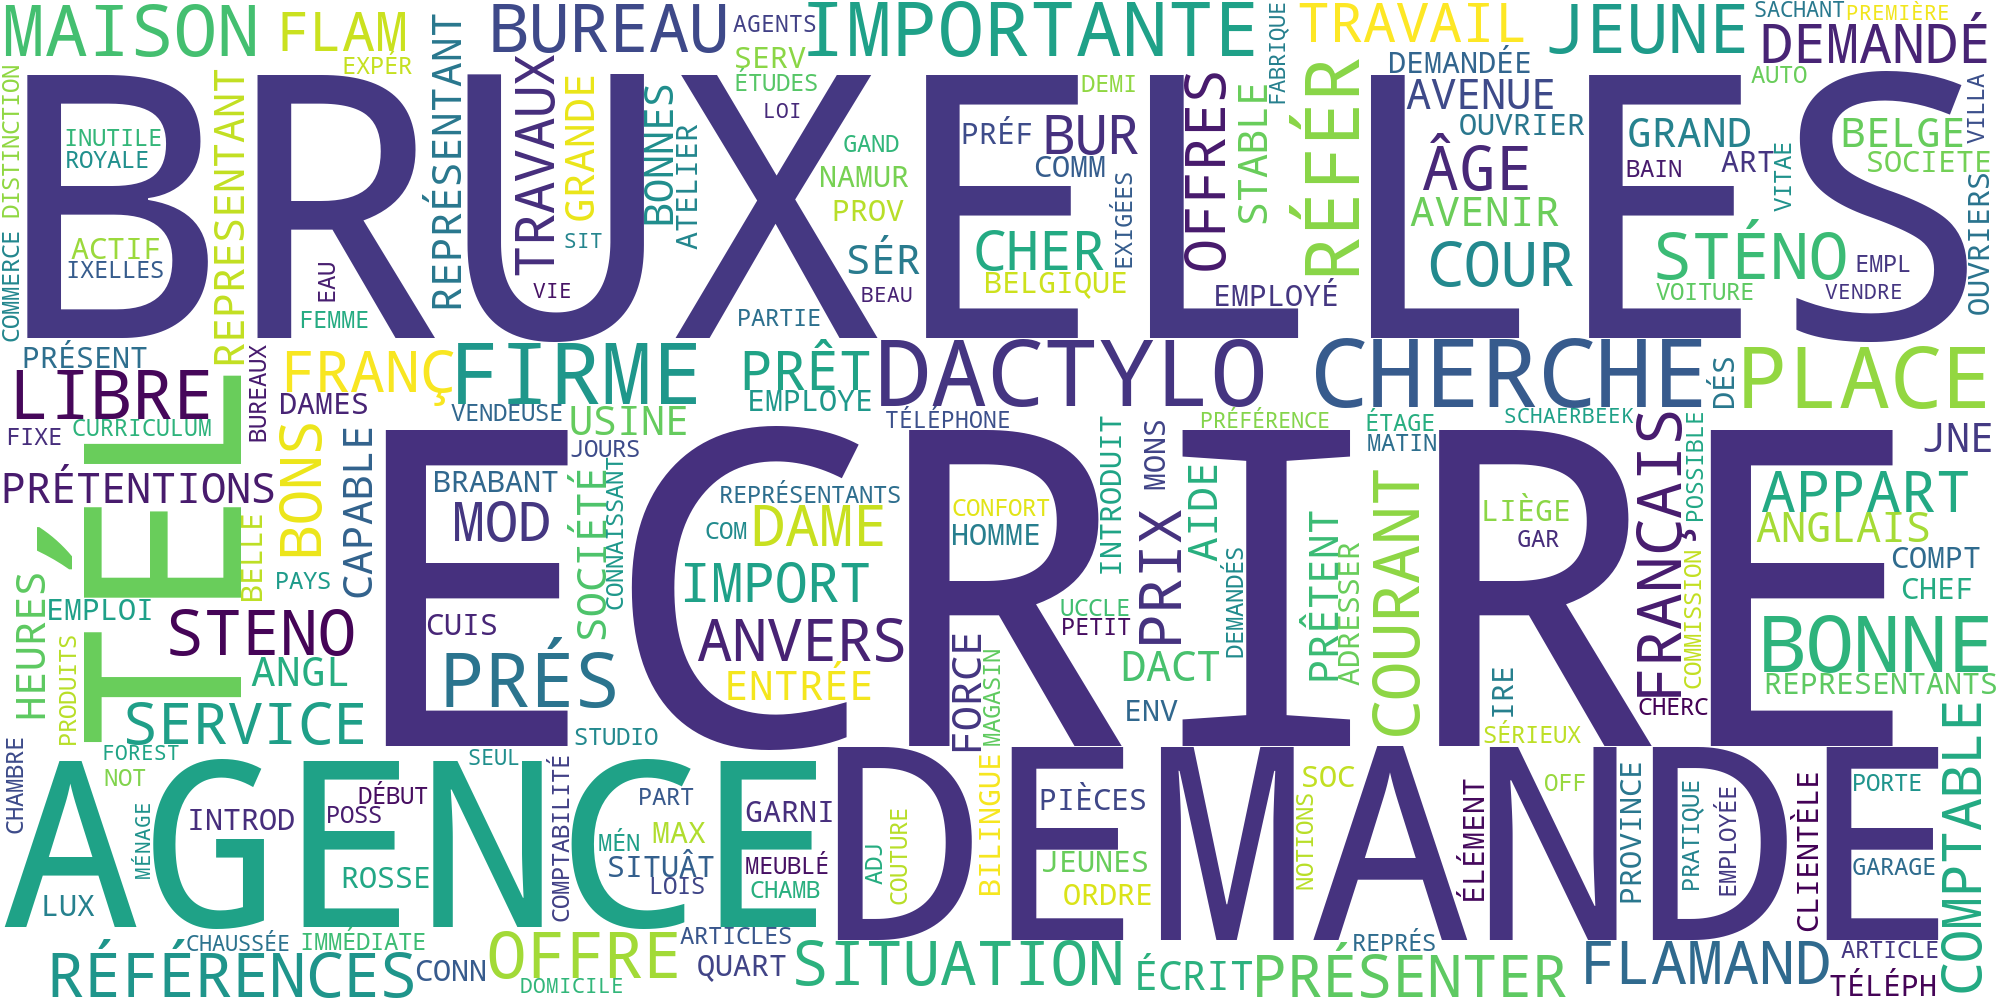

In [10]:
notre_nuage2 = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
notre_nuage2.to_file(os.path.join(path, f"{year1}.png"))
Image(filename=os.path.join(path, f"{year1}.png"))

In [1]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [2]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [3]:
infile = f"../1946_clean.txt"
sentences = MySentences(infile)

In [4]:
bigram_corpus2 = Phrases(sentences)

In [5]:
bigram_phraser2 = Phraser(phrases_model=bigram_corpus2)

In [6]:
trigram_phrases2 = Phrases(bigram_phraser2[sentences])

In [7]:
trigram_phraser2 = Phraser(phrases_model=trigram_phrases2)

In [8]:
training_model2 = list(trigram_phraser2[bigram_phraser2[sentences]])

In [9]:
%%time
model2 = Word2Vec(
training_model2,
vector_size = 32,
window = 8,
min_count = 5,
workers = 16,
epochs = 5,
)

CPU times: total: 5.14 s
Wall time: 5.19 s


In [10]:
outfile = f"../newspapers.model"
model2.save(outfile)

In [11]:
model2.wv["flamand"]

array([ 0.01551284,  0.01983753, -0.01282483,  0.01138157, -0.0137593 ,
        0.00989221,  0.02575089,  0.0118239 , -0.01448352, -0.00951051,
        0.02495352,  0.03023094,  0.01870679, -0.01002889, -0.00566773,
       -0.01947401, -0.01371245,  0.01034495, -0.02049137, -0.02067982,
        0.02588094,  0.02966072,  0.02610161,  0.00443225, -0.02755207,
       -0.02402202,  0.0045717 , -0.02941417, -0.02372183,  0.00597232,
       -0.00985529, -0.02847297], dtype=float32)

In [12]:
model2.wv["guerre"]

array([-0.00048484, -0.00110691, -0.00939889,  0.02716447,  0.01820077,
        0.00760051, -0.00340484,  0.00403376,  0.00764054, -0.02988826,
       -0.02719556,  0.02836086,  0.00279133, -0.00286004,  0.02769731,
       -0.01471599, -0.02327216, -0.00012075,  0.0267839 ,  0.02795263,
       -0.0100207 ,  0.01606064,  0.02752259, -0.02480944,  0.02036889,
        0.00330142, -0.02933547, -0.00469911, -0.01912917, -0.02155724,
        0.02279938,  0.01043179], dtype=float32)

In [13]:
model2.wv.similarity("flamand", "wallon")

-0.28843206

In [14]:
model2.wv["bruxelles"]

array([ 0.03072699, -0.02457131, -0.0076456 , -0.00537583,  0.02632399,
       -0.02025358,  0.00088472, -0.01355842, -0.03161428,  0.01607534,
       -0.02745946, -0.01371406,  0.00085851, -0.00016945, -0.02512003,
        0.03096659,  0.01478624,  0.02900132, -0.02687086,  0.01506036,
       -0.01135175,  0.00216362,  0.02934681, -0.01552977,  0.014105  ,
       -0.02199902, -0.01262581,  0.03044759, -0.00662715,  0.00039054,
       -0.01441965, -0.02330725], dtype=float32)

In [15]:
model2.wv.similarity("anvers", "bruxelles")

-0.0012772083

In [16]:
print(model2.wv.most_similar(positive=["flamand"], negative=['wallon']))

[('inut_ser', 0.6651413440704346), ('recitai', 0.6254246234893799), ('facturier', 0.6092352271080017), ('log_nourr', 0.6057868599891663), ('citadelle', 0.6038238406181335), ('nora_bar', 0.5920528769493103), ('exp', 0.5919840335845947), ('reine_broadway', 0.5824252367019653), ('boutons_ceintures', 0.5818424224853516), ('experimentes', 0.5745435357093811)]


In [17]:
model2.wv.most_similar("flamand", topn=15)

[('atel_domicile', 0.6578066945075989),
 ('agrafes', 0.6475118398666382),
 ('veto', 0.6470350623130798),
 ('reer', 0.6431470513343811),
 ('travaux_ecritures', 0.6356555223464966),
 ('charcutier', 0.635633111000061),
 ('poutres', 0.608786940574646),
 ('iam', 0.6052287220954895),
 ('sten', 0.6043423414230347),
 ('trousses', 0.6030843257904053),
 ('genereux', 0.5966917872428894),
 ('tobre', 0.5930735468864441),
 ('bataves', 0.5806246399879456),
 ('tenir_fiches', 0.5803529620170593),
 ('oignons_oignons', 0.5782073140144348)]

In [18]:
model2.wv.most_similar("bilingue", topn=10)

[('publicite_trams_autobus', 0.6798445582389832),
 ('kerke', 0.6753824949264526),
 ('dtxelles', 0.6513664126396179),
 ('altit', 0.643409252166748),
 ('creux', 0.6404683589935303),
 ('muni_secours_religion', 0.6224580407142639),
 ('rossefl', 0.6211616396903992),
 ('comprimes', 0.620635986328125),
 ('franc_neerl', 0.6200544834136963),
 ('pal_levrier_courses', 0.6044920086860657)]

In [19]:
model2.wv.most_similar("conflit", topn=10)

[('pouv_adj_collect', 0.6661208271980286),
 ('jor', 0.6419979929924011),
 ('prod_chimiq', 0.6319255232810974),
 ('gevraagd', 0.6219106912612915),
 ('administrateur_delegue', 0.6184705495834351),
 ('place_stab', 0.6134536862373352),
 ('remet', 0.6117068529129028),
 ('societe_beige', 0.6093502640724182),
 ('trlclte', 0.6081204414367676),
 ('sollicitees', 0.605341911315918)]